# September

## 6th

### (M) 429. N-ary Tree Level Order Traversal ★

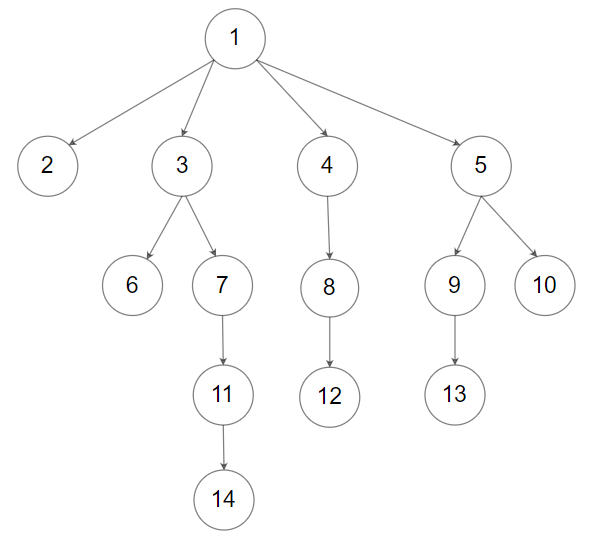

In [19]:
class Node:
    def __init__(self, val=None, children=None):
        self.val = val
        self.children = children

root = Node(1)

root.children = [Node(2), Node(3), Node(4), Node(5)]
root.children[1].children = [Node(6), Node(7)]
root.children[2].children = [Node(8)]
root.children[3].children = [Node(9), Node(10)]

root.children[1].children[1].children = [Node(11)]
root.children[2].children[0].children = [Node(12)]
root.children[3].children[0].children = [Node(13)]

root.children[1].children[1].children[0].children = [Node(14)]

Iterative BFS template that I usually use - 5 / 11

In [22]:
from typing import List

class Solution:
    def levelOrder(self, root: 'Node') -> List[List[int]]:
        
        if root == None: return None
        
        def bfs(root):
            res = [[root.val]]
            
            queue, levelNodes = [root], []
            parent, children = 1, 0
            
            while queue:
                node = queue.pop(0)
                parent -= 1
                
                
                if node.children != None:
                
                    for child in node.children:

                        queue.append(child)
                        levelNodes.append(child.val)
                        children += 1
                
                if parent == 0:
                    
                    res.append(levelNodes)
                    levelNodes = []
                    parent, children = children, 0
                    
            return res
        
        return bfs(root)[:-1]
    
Solution().levelOrder(root)

[[1], [2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13], [14]]

Simpified code - 13 / 50

In [ ]:
from typing import List

class Solution:
    def levelOrder(self, root: 'Node') -> List[List[int]]:
        
        if root == None: return None
        
        def bfs(root):
            res = [[root.val]]
            
            queue, levelNodes = [root], []
            parent, children = 1, 0
            
            while queue:
                node = queue.pop(0)
                parent -= 1
                
                
                if node.children != None:
                
                    queue.extend(node.children)
                    levelNodes.extend(list(map(lambda x:x.val, node.children)))
                    children += len(node.children)
            
                
                if parent == 0:
                    
                    res.append(levelNodes)
                    levelNodes = []
                    parent, children = children, 0
                    
            return res
        
        return bfs(root)[:-1]
    
Solution().levelOrder(root)

Best concise solution from <a href = "https://leetcode.com/problems/n-ary-tree-level-order-traversal/discuss/148877/Python-5-lines-BFS-solution">LeetCode discussion</a>

In [ ]:
class Solution(object):
    
    def levelOrder(self, root):
        
        q, ret = [root], []
        while any(q):
            ret.append([node.val for node in q])
            q = [child for node in q for child in node.children if child]
        return ret

### (M) 875. Koko Eating Bananas

Binary search - 25 / 75

In [ ]:
class Solution:
    def minEatingSpeed(self, piles, H):
        beg, end = 0, max(piles)
        while beg + 1 < end:
            mid = (beg + end)//2
            if sum(ceil(i/mid) for i in piles) > H:
                beg = mid
            else:
                end = mid
                
        return end